# **TO DO FIRST**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
from fastai.vision import *
from fastai.metrics import error_rate

https://github.com/bchao1/Anime-Face-Dataset/

https://www.kaggle.com/tunguz/70000-real-faces-1

# ***Downloading and Extracting Data***

https://www.kaggle.com/sanyam1992000/anime-faces-vs-human-faces

In [ ]:
from google.colab import files
my_file=files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
import pandas as pd
import os
cred = pd.read_json("kaggle.json",lines=True)
os.environ['KAGGLE_USERNAME'] = cred.iloc[0][0]
os.environ['KAGGLE_KEY'] = cred.iloc[0][1]

In [ ]:
!kaggle datasets download -d sanyam1992000/anime-faces-vs-human-faces

100% 3.81G/3.81G [01:10<00:00, 36.6MB/s]
100% 3.81G/3.81G [01:11<00:00, 57.5MB/s]


In [ ]:
!unzip "*.zip"

In [ ]:
path = 'Data'
classes = ['anime', 'human']

In [ ]:
for c in classes:
    print(c)
    verify_images(path + '/' +c, delete=True, max_size=3000)

anime
cannot identify image file <_io.BufferedReader name='Data/anime/154_2000.jpg'>
cannot identify image file <_io.BufferedReader name='Data/anime/1147_2001.jpg'>


cannot identify image file <_io.BufferedReader name='Data/anime/2125_2001.jpg'>
human


# ***Data Augmentation***

***Applying Jitter***

In [ ]:
def apply_jitter(folder, name):
  image = open_image(folder + '/' + name)
  img_counter = folder + '/' + 'jitter' + str(name.split('.')[0])
  idx = 0
  for magnitude in np.linspace(-0.05,0.05,2):
    image.jitter(magnitude)
    dest = str(img_counter)+ str(idx) +".jpg"
    image.save(dest)
    idx += 1


***Applying Dihedral***

In [ ]:
def apply_dihedral1(image, folder, name):
  img_counter = folder + '/' + 'dihedral' + str(name.split('.')[0])
  idx = 0
  for i in range(1,5,3):
    new_img = dihedral(image, i)
    dest = str(img_counter)+ str(idx) +".jpg"
    new_img.save(dest)
    idx += 1



***Changing Brightness***

In [ ]:
def change_brightness(image, folder, name):
  img_counter = folder + '/' + 'brightness' + str(name.split('.')[0])
  idx = 0
  for change in np.linspace(0.2,0.8,2):
    new_img = brightness(image, change)
    dest = str(img_counter)+ str(idx) +".jpg"
    new_img.save(dest)
    idx += 1

***Changing Contrast***

In [ ]:
def change_contrast(image, folder, name):
  img_counter = folder + '/' + 'contrast' + str(name.split('.')[0])
  idx = 0
  for scale in np.exp(np.linspace(log(0.5),log(2),2)):
    new_img = contrast(image, scale)
    dest = str(img_counter)+ str(idx) +".jpg"
    new_img.save(dest)
    idx += 1

***Fliping Horizontally***

In [ ]:
def flip_horizontally(image, folder, name):
  img_counter = folder + '/' + 'contrast' + str(name.split('.')[0])
  idx = 0
  new_img = flip_lr(image)
  dest = str(img_counter)+ str(idx) +".jpg"
  new_img.save(dest)
  idx += 1

***Common function to apply all filters***

In [ ]:
def data_augmentation(images):
  for img in images[:250]:
    apply_jitter(path + '/' + c , img)
      
  print("done 0")

  for img in images[250:500]:
    change_brightness(open_image(path + '/' + c + '/' + img),path + '/' + c , img )

  print("done 1")

  for img in images[500:750]:
    apply_dihedral1(open_image(path + '/' + c + '/' + img),path + '/' + c , img )

  print("done 2")

  for img in images[750:1000]:
    change_contrast(open_image(path + '/' + c + '/' + img),path + '/' + c , img )

  print("done 3")

  for img in images[1000:1250]:
    flip_horizontally(open_image(path + '/' + c + '/' + img),path + '/' + c , img )

In [ ]:
path = 'Data'
classes = ['anime', 'human']

for c in classes:
  images = os.listdir(path + '/' +c)
  print(c)
  print(len(images))

  data_augmentation(images) 

anime
3004
done 0
done 1
done 2
done 3
human
3000
done 0
done 1
done 2
done 3


***Checking number of images after Data Augmentation***

In [ ]:
path = 'Data'
classes = ['anime', 'human']

for c in classes:
    images = os.listdir(path + '/' +c)
    print(c)
    print(len(images))

anime
5254
human
5250


# ***Training***




***Keeping Random values same***

In [ ]:
np.random.seed(2)

In [ ]:
tfms = get_transforms(do_flip=True)
data = ImageDataBunch.from_folder( Path("/content/Data"), valid_pct=0.2, bs=64, size=224, ds_tfms=get_transforms()).normalize(imagenet_stats)

***Showing 64 random images from dataset***

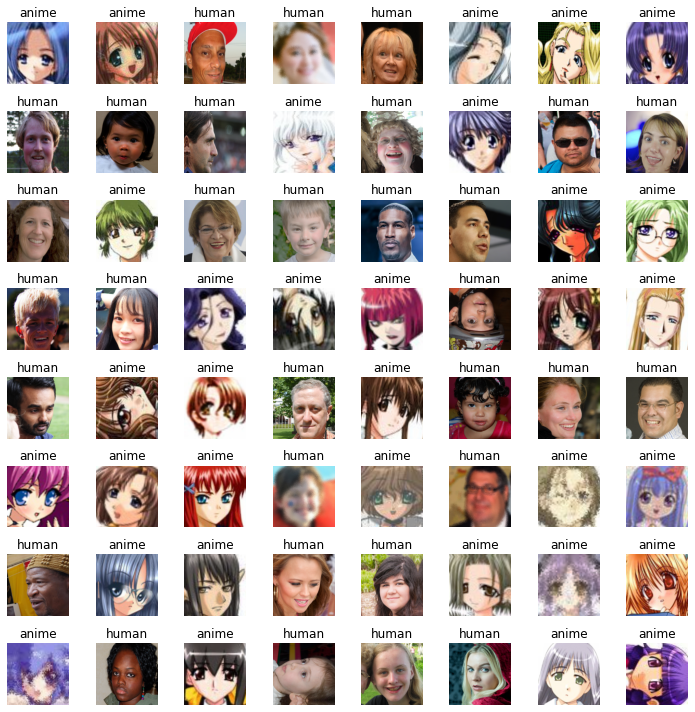

In [ ]:
data.show_batch(rows=10, figsize=(10,10))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['anime', 'human'], 2, 8404, 2100)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)
# help(cnn_learner)
# doc(cnn_learner)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
from PIL import ImageFile
from PIL import Image
ImageFile.LOAD_TRUNCATED_IMAGES = True
Image.LOAD_TRUNCATED_IMAGES = True

***Training***

In [ ]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.012230,0.006641,0.997619,05:44
1,0.006613,0.000045,1.000000,05:36
2,0.000826,0.000002,1.000000,05:41
3,0.000467,0.000002,1.000000,05:35


***Exporting model***

In [ ]:
os.makedirs("/content/drive/My Drive/dl_projects/anime_faces_vs_human_faces",exist_ok=True)
dir = "/content/drive/My Drive/dl_projects/anime_faces_vs_human_faces"

In [ ]:
learn.save(dir+"/Stage-1")

In [ ]:
dir = "/content/drive/My Drive/dl_projects/anime_faces_vs_human_faces"

learn.load(dir + "/Stage-1")

In [ ]:
learn.export(dir+"/export.pkl")

***Uploading export.pkl***

In [ ]:
dir = "/content/drive/My Drive/dl_projects/anime_faces_vs_human_faces"
!pip install -U kora
from kora.drive import upload_public
url = upload_public(dir+"/export.pkl")
url

Requirement already up-to-date: kora in /usr/local/lib/python3.6/dist-packages (0.4.22)


'https://drive.google.com/uc?id=1gagDEY69S5wHwl8AbcPFkKtRuWOj3nz1'

# ***Results***

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

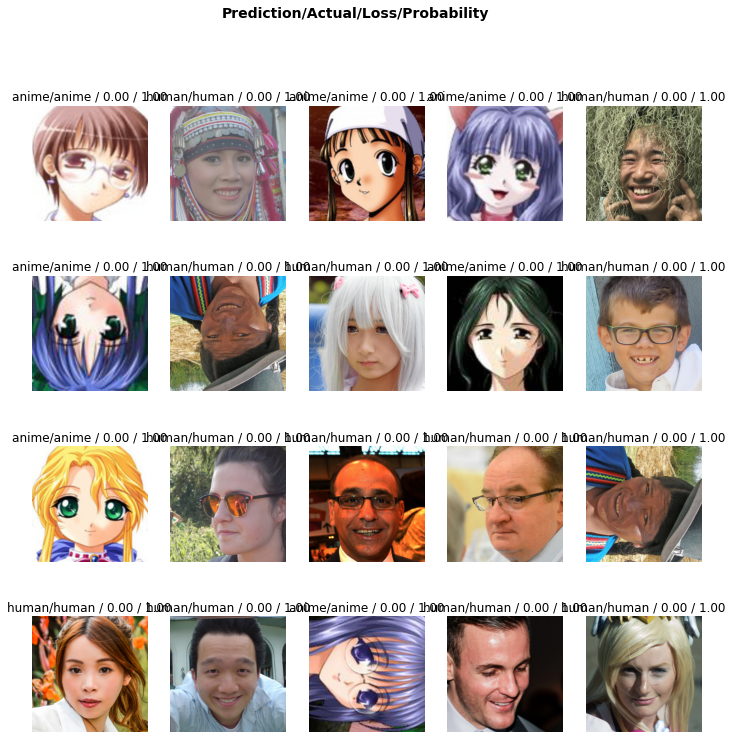

In [ ]:
interp.plot_top_losses(20, figsize=(12,12))

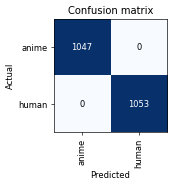

In [ ]:
interp.plot_confusion_matrix(figsize=(3,3), dpi=60)

In [ ]:
interp.most_confused(min_val=2)

[]